# MT642A, Exercise 2, Neutron and synchrotron radiation - Teacher's version

### Task 5
The electric field of an electro-magnetic wave can be described by:
$$E(z, t) = E_0 e^{i(kz - \omega t)}$$

Make a plot including $E$ and $|E|^2$ as a function of *z*, for *t*=0. $\lambda$ = 1Å. y-axis should be in units of $E_0$. Include at least 10 periods.

In [1]:
%pylab inline
import seaborn as sns
sns.set(style='whitegrid')


Populating the interactive namespace from numpy and matplotlib


In [2]:
z = linspace(5e-11,1e-9,100)
l = 1e-10 #wavelength = 1Å
k = 2*pi/l
E0 = 4.

b = 2e-10
Ef = E0*exp((1j)*k*z)
figure(figsize(12, 8))
plot(z,(Ef/E0).real, 'r--')

# should be fine if using (abs(Ef))**2 as well.
Ef2 = Ef*Ef.conjugate()

plot(z, Ef2/E0, 'k--')
xlabel('z (m)')
ylabel('E/E0 (arb. units)')
legend(['$E$', '$\|E\|^2$'])
show()

/home/jakob/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


### Task 6
Use tabulated values of neutron cross-sections to plot a graph of attenuation of neutron intensity $\varepsilon = 1 - I/I_0 $ as a function of thickness of sample for Iron, Zirconium, and Aluminium.

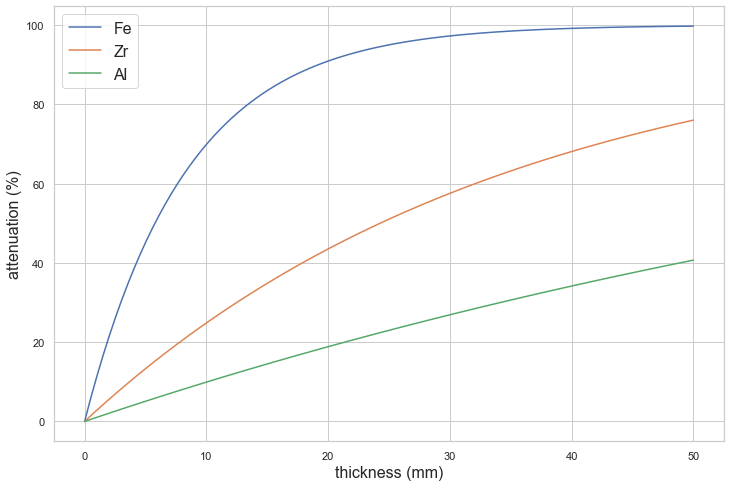

In [4]:
import pandas as pd

# Data from https://www.ncnr.nist.gov/resources/n-lengths/
df = pd.DataFrame()
df['Atom'] = ['Fe', 'Zr', 'Al']
df['M'] = [55.845, 91.224, 26.982]
df['rho'] = [7847, 6511, 2700]
df['xsscat'] = [11.62, 6.46, 1.503]
df['xsabs'] = [2.56, 0.185, 0.231]

df['xstot'] = df['xsscat'] + df['xsabs']

Na = 6.0221409e+23
t = linspace(0,50,100)

def attenuate(atom, M, rho, xstot):
    '''Helper function to calulate attenuation from.
    Result is an (n x len(t)) sized array for n atom types and thickness array t.'''
    xstot = xstot*1e-28
    M = M*1e-3
    Nrho = Na*rho/(M)
    return (1 - exp(-Nrho*xstot*t*1e-3))*100
    
results = [attenuate(row[0],row[1],row[2],row[3]) for row in df[['Atom','M', 'rho', 'xstot']].values]

figure(1, figsize=(12,8))
for i in [0,1,2]:
    plot(t, results[i], label=df['Atom'][i])
    


xlabel('thickness (mm)', size=16)
ylabel('attenuation (%)', size=16)
legend(fontsize=16)

$$\epsilon = 1 - e^{N_A\rho/M (xs + a)l}$$